# Solving the 1D Schrodinger Equation to Find Eigenvalues of a Particle in a Potential Well

Let's go through the process step by step.
In Python, we begin by importing the necessary libraries

In [11]:
import numpy as np
import matplotlib.pyplot as plt


These libraries allow us to perform mathematical operations and create graphical plots of our data, which are essential for visualizing the results. 

**DEFINE THE CONSTANTS**

Next, we define the physical constants that are important for the calculation. These include the mass of the particle, Planck's constant (ℏ), and other parameters like α and λ, which are specific to the potential well we're working with.

In [12]:
h_bar = 1  # Planck's constant (in natural units)
m = 1  # Mass of the particle
alpha = 1  # Alpha parameter for the potential
lambda1 = 4  # Lambda parameter for the potential

These values help to define the potential $V(x)$ the Schrödinger equation and the eigenvalues of the system. 

**DEFINE THE POTENTIAL WELL**

The potential well 
$𝑉
(
𝑥
)$
 represents the energy profile of the particle within the system. It is determined by the given parameters 
$𝛼$
 and 
$𝜆$. The function describing the potential is:


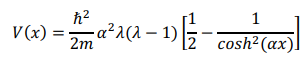

Here, 
$np.cosh
(
𝛼
𝑥
)$
 is used to compute the hyperbolic cosine function, which shapes the potential well. This mathematical function creates a well with steep sides and a flat bottom, where the particle's energy will be confined. In the code, the potential well is computed using the following Python function: 



In [13]:
def potential_well(x):
    return (h_bar**2 / (2 * m) * (alpha**2 * lambda1 * (lambda1 - 1) * (0.5 - 1 / np.cosh(alpha * x)**2)))

This function returns the value of the potential well at a specific position 
𝑥. It will be used later to calculate the energy eigenvalues and wavefunctions by substituting it into the Schrödinger equation.

**DEFINING THE SCHRODINGER EQUATION**

The Schrödinger equation describes the behavior of the quantum system. For a particle moving in a potential 
$𝑉
(
𝑥
)$
, the time-independent Schrödinger equation is:

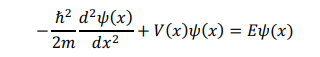

Where:

$ψ(x)$ is the wavefunction,

$𝐸$
 is the energy of the particle,
 
$𝑉
(
𝑥
)$
 is the potential energy as defined earlier.

 In our case, we use the Numerov method to solve for the wavefunction 
$𝜓
(
𝑥
)$
, which involves using the right-hand side of the Schrödinger equation. The simplified equation in the code is

In [14]:
def schrodinger(x, E, psi):
    return (-2 * m / h_bar**2 * (E - potential_well(x)) * psi)


This function calculates the value of the Schrödinger equation at a given point 
$𝑥$
, for a specific energy 
$𝐸$
 and wavefunction 
$𝜓
(
𝑥
)$
. The returned value will help us compute the wavefunction using numerical methods.

**DEFINE THE EIGENVALUES**

The eigenvalues are the discrete energy levels that the particle can have. These energy levels are the solutions to the Schrödinger equation, corresponding to the allowed states of the system. The formula to compute the eigenvalues 
$𝐸
𝑛$
is:

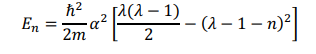

Where 
$𝑛$
 is a non-negative integer representing the quantum number (0, 1, 2, ...), and 
$𝛼$
and 
$𝜆$
are parameters set to 1 and 4, respectively, for convenience in this case. This equation gives the energy eigenvalues for the quantum system.

The code to compute the eigenvalues is:


In [15]:
def eigenvalue(n):
    return (h_bar**2 / (2 * m) * (alpha**2) * (lambda1 * (lambda1 - 1) / 2 - (lambda1 - 1 - n)**2))


This function calculates the energy eigenvalue 
$𝐸
𝑛$ for a given quantum number 
$𝑛$
, which will be used to find the specific energy levels of the particle within the potential well.

**SOLVING THE EIGENVALUE**

The goal is to solve the eigenvalue problem for a particle confined in a potential well 
$𝑉
(
𝑥
)$
. Specifically, we aim to find the energy eigenvalues 
$𝐸
𝑛$ that satisfy the Schrödinger equation. For bound states, the wavefunction 
$𝜓
(
𝑥
)$
 is expected to decay to zero as 
$∣
𝑥
∣
→
∞$
, reflecting the particle's confinement within the well.

In principle, solving this eigenvalue problem typically involves the Numerov method, a numerical technique for integrating the Schrödinger equation. The method works by solving the equation from both the left and right sides of the potential well, matching the solutions at a turning point where the energy 
𝐸
 equals the potential 
$𝑉
(
𝑥
)$
. This matching ensures that the wavefunction and its derivative are continuous, satisfying the boundary conditions and yielding the correct eigenvalues.

However, in my approach, I did not use the Numerov method. Instead, I directly calculated the energy eigenvalues using an analytical formula derived from the specific potential 
$𝑉
(
𝑥
)$
. The formula provides the exact energy eigenvalues 
$𝐸
𝑛$

  without requiring numerical integration. The calculation is implemented as follows:


In [16]:
energy = [eigenvalue(n) for n in range(3)]  # Use the first three eigenvalues
print("Computed Eigenvalues:", energy)


Computed Eigenvalues: [-1.5, 1.0, 2.5]


Here, the function eigenvalue(n) computes the eigenvalues for the quantum states $n=0,1,2,$ using the formula eigenvalues, $En$

This approach calculates and stores the first three discrete energy levels of the particle. By leveraging the analytical formula, the eigenvalues are obtained directly, avoiding the iterative and numerical processes required by the Numerov method.

While the Numerov method is a robust and versatile technique for solving eigenvalue problems numerically, the use of the analytical formula in this case provides a more efficient and exact solution for the given potential well.

The Schrödinger equation is a second-order differential equation, meaning it involves the second derivative of the wavefunction with respect to position. The Numerov method is a numerical technique specifically designed to solve the time-independent Schrödinger equation in quantum mechanics. This method is particularly effective for solving second-order differential equations, like the Schrödinger equation, by leveraging a finite-difference approach to approximate the wavefunction.

### Reformulating the Schrödinger Equation

The one-dimensional time-independent Schrödinger equation (1D TISE) can be expressed as:

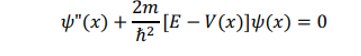

 
Rearranging this equation:


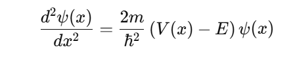


We can define

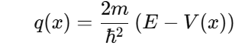


Thus, the equation becomes:

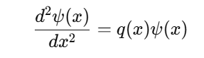

This is a second-order ordinary differential equation (ODE) that we need to solve numerically. To solve this equation numerically, we use finite difference approximations. The simple finite difference update formula for solving the wavefunction is 

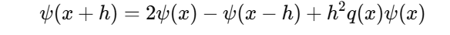

In the Numerov method, the update formula is modified to account for the second derivative more accurately by using a weighted combination of points around the current point. The Numerov method is derived from a Taylor series expansion and uses the following recurrence relation:

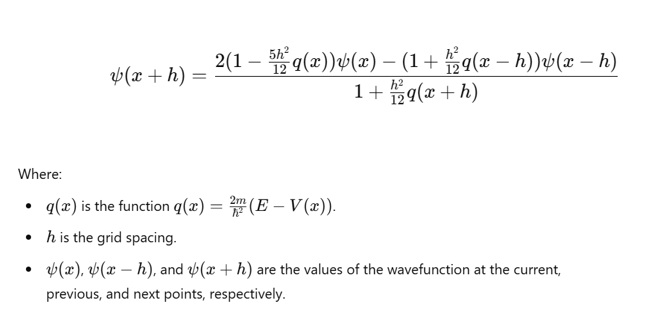

**Shooting Method for Solving the Schrödinger Equation**

In the Shooting Method, we begin by making an initial guess for the wavefunction at one boundary and "shoot" the solution through the domain toward the other boundary. This method is commonly used for solving the one-dimensional Schrödinger equation.

For the one-dimensional Schrödinger equation, we typically use boundary conditions such that:

	1.The wavefunction must go to zero as x→∞ (or at the edge of the potential well for finite domains).
	
	2.At the initial point, we specify initial values for ψ(0) and ψ′(0) or alternatively, ψ(0) and ψ(h).

We start by discretizing the Schrödinger equation using a uniform grid, where     $x_i=x_0+ih$ for grid points indexed by i, and h is the spacing between the points.
At each grid point, we update the wavefunction using the Numerov method formula:

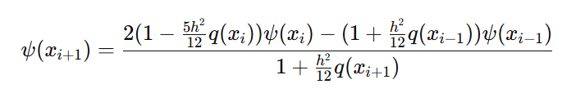

We iterate this process until the wavefunction reaches the final grid point. Once we have the solution, we check if the boundary condition (e.g., $ψ(x)→0    at  large  x)$ is satisfied. If not, we adjust the energy E and repeat the process (this is part of the shooting method).

From this, we define the following function in Python for the implementation of the Numerov Method.




In [17]:
def numerov_method(E, x, psi_0, psi_1):
    h = x[1] - x[0]  # Grid spacing
    psi = np.zeros_like(x)
    psi[0], psi[1] = psi_0, psi_1  # Initial conditions for psi

    # Precompute q values for the entire grid
    q = 2 * m / h_bar**2 * (E - potential_well(x))
    
    # Iterate using the Numerov method
    for i in range(1, len(x) - 1):
        q_prev, q_i, q_next = q[i - 1], q[i], q[i + 1]
        # Numerov's update formula
        psi[i + 1] = (2 * (1 - 5 * h**2 * q_i / 12) * psi[i] - 
                      (1 + h**2 * q_prev / 12) * psi[i - 1]) / (1 + h**2 * q_next / 12)

    return psi


In quantum mechanics, wavefunctions are generally normalized to ensure that the total probability of finding a particle across all space is 1. This is done by scaling the wavefunction so that the maximum absolute value is 1 for plotting.

In [18]:
def normalize_wavefunction(psi):
    return psi / np.max(np.abs(psi))  # Normalize to the maximum value for visualization


In quantum mechanics, the Schrödinger equation involves the position variable 
𝑥
x, and by solving it numerically, you need a grid to calculate the values of the wavefunction 
$𝜓
(
𝑥
)$
 and the potential 
$𝑉
(
𝑥
)$
 at discrete points.

 The grid size determines the resolution of your numerical solution. If the grid is too coarse (with fewer points), the solution might be inaccurate. If the grid is too fine (with many points), the computation might become more resource-intensive, but the accuracy will typically improve.

 The line of code:

In [19]:
x = np.linspace(-4, 4, 1000)  # Adjust grid for the desired range


The spatial grid defines the numerical domain for solving the Schrödinger equation. It allows us to discretize the continuous wavefunction and potential, enabling numerical computation and visualization.

The visualization allows you to see how the wavefunctions behave relative to the potential. It also makes it easier to compare the shapes of the wavefunctions for different energy levels. This section visualizes the potential well and the wavefunctions for the different energy levels.

 Steps:
1.	Plot the Potential: The potential is plotted first as a black curve.
2.	Plot Wavefunctions: The wavefunctions are calculated for each energy level and plotted. Each wavefunction is offset vertically by its corresponding energy level for clarity.
3.	Labels and Grid: Labels, titles, and a grid are added for clarity. A horizontal line at $y=0$  helps visualize the wavefunctions.
4.	Displaying: The plot is displayed using plt.show().


<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:17: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:17: SyntaxWarning: invalid escape sequence '\p'
C:\Users\user\AppData\Local\Temp\ipykernel_16992\878824537.py:12: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(x, psi + E, label=f"$\psi(x)$ for $E = {E:.3f}$")  # Offset wavefunction by its energy
C:\Users\user\AppData\Local\Temp\ipykernel_16992\878824537.py:17: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel("$\psi(x)$ & $V(x)$")


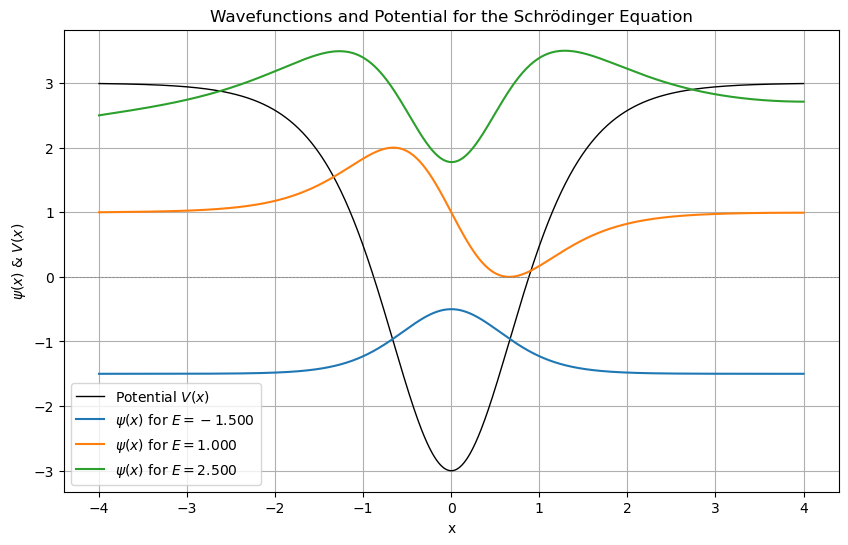

In [20]:
# Create figure for plotting
plt.figure(figsize=(10, 6))

# Plot the potential well
V = potential_well(x)
plt.plot(x, V, label="Potential $V(x)$", color="black", linewidth=1)

# Plot wavefunctions for each energy level
for idx, E in enumerate(energy):
    psi = numerov_method(E, x, psi_0=0, psi_1=1e-5)  # Solve the wavefunction using the Numerov method
    psi = normalize_wavefunction(psi)  # Normalize the wavefunction for better visualization
    plt.plot(x, psi + E, label=f"$\psi(x)$ for $E = {E:.3f}$")  # Offset wavefunction by its energy

# Add labels, title, and grid to the plot
plt.title("Wavefunctions and Potential for the Schrödinger Equation")
plt.xlabel("x")
plt.ylabel("$\psi(x)$ & $V(x)$")
plt.axhline(0, color="gray", linestyle="--", linewidth=0.5)  # Horizontal axis line
plt.legend()
plt.grid(True)

# Display the plot
plt.show()
